In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [21]:
x = np.linspace(-20, 20, 100)


def gaussian(a, w, x):
    return a*np.exp(-(x/w)**2)


def harmonic(w, x):
    return (1/2)*(w*x)**2


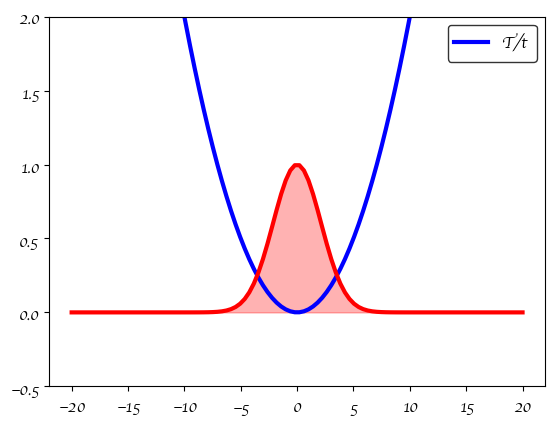

In [28]:
# os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2019/bin/x86_64-darwin'
# plt.rc('text', usetex=True)
plt.rc('font', family='cursive')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('mathtext', default='default')

fig, ax = plt.subplots()
ax.plot(x, harmonic(0.2, x), color='blue', lw=3, label='$T/t$')
ax.plot(x, gaussian(1, 3, x), color='red', lw=3)
ax.fill_between(x, 0, gaussian(1, 3, x), color='red', alpha=.3)
ax.set_ylim(-0.5, 2)
l = plt.legend(edgecolor='black', loc='best', fontsize=12)
#ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x)


In [43]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
L = 1
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([L], dtype=int),
           trap=(50, 1000),
           lc=(1800,),
           dim=1,
           sparse=True,
           symmetry=True,
           verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]

A, U = singleband_WF(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
print(dvr.R0[0] * .6)


Lattice: lattice shape is square; lattice constants set to: (1800, 1800)
detU = 1.0
1.7999999999999998


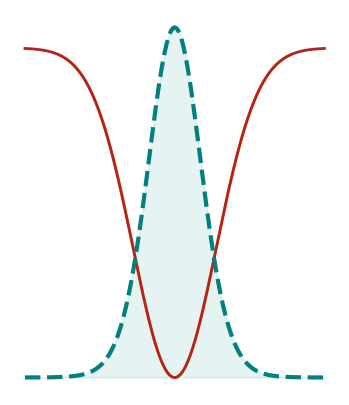

In [45]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4.25, 5))


y = np.array([0])
z = np.array([0])
taillen = 1.4

# Plot single traps
for i in range(dvr.lattice.N):
    opacity = 1
    shift = dvr.trap_centers[i]
    dvr.update_waist(dvr.waists[i])
    x = np.linspace(shift[0] - taillen, shift[0] + taillen, 500)
    X = np.meshgrid(x, y, z, indexing='ij')
    vi = dvr.Voff[i] * DVR.Vfun(dvr, X[0] - shift[0], X[1] - shift[1], X[2])
    plt.plot(x, vi[:, 0, 0], '-', label='V',
             lw=2, color='orange', alpha=opacity)

# Plot total potential
x = np.linspace(-dvr.R0[0] * .6, dvr.R0[0] * .6, 500)
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0], '-', label='V', lw=2, color='firebrick')
vmin = np.min(v)

wf = .8 * fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]) + vmin
for i in range(dvr.lattice.N):
    shade_alpha = 0.1
    line_alpa = 1
    line_shape = '--'
    plt.plot(x,
             wf[:, i], line_shape, lw=3, color='teal',
             label=f'$w_{i + 1}(x)$', alpha=line_alpa)
    plt.fill_between(x, vmin, wf[:, i], color='darkcyan', alpha=shade_alpha)
for i in dvr.lattice.links:
    plt.fill_between(x, vmin, np.min(np.array([wf[:, i[0]],
                                               wf[:, i[1]]]), axis=0), color='teal', alpha=.3)
plt.xlabel('dx')
plt.axis('off')
plt.savefig('fig1a.svg', transparent=True, bbox_inches='tight')


In [50]:
from Hubbard.equalizer import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
L = 2
R0 = np.array([3, 3, 7.2])
dvr = HubbardEqualizer(N,
                       R0=R0,
                       lattice=np.array([L], dtype=int),
                       trap=(50, 1000),
                       lc=(1450,),
                       dim=1,
                       sparse=True,
                       symmetry=True,
                       verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]

A, U = singleband_WF(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
print(dvr.R0[0] * .7)


Lattice: lattice shape is square; lattice constants set to: (1450, 1450)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
detU = -0.9999999999999999
2.6075


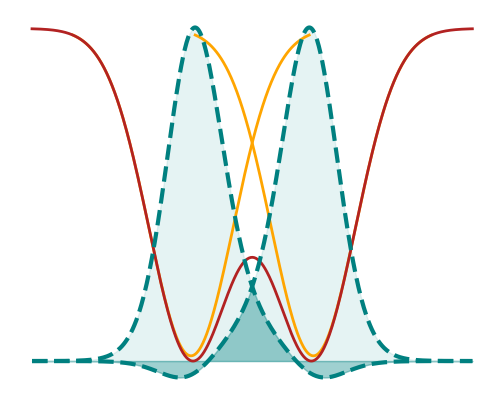

In [51]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.25, 5))


y = np.array([0])
z = np.array([0])
taillen = 1.4

# Plot single traps
for i in range(dvr.lattice.N):
    opacity = 1
    shift = dvr.trap_centers[i]
    dvr.update_waist(dvr.waists[i])
    x = np.linspace(shift[0] - taillen, shift[0] + taillen, 500)
    X = np.meshgrid(x, y, z, indexing='ij')
    vi = dvr.Voff[i] * DVR.Vfun(dvr, X[0] - shift[0], X[1] - shift[1], X[2])
    plt.plot(x, vi[:, 0, 0], '-', label='V',
             lw=2, color='orange', alpha=opacity)

# Plot total potential
x = np.linspace(-dvr.R0[0] * .7, dvr.R0[0] * .7, 500)
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0], '-', label='V', lw=2, color='firebrick')
vmin = np.min(v)

wf = .8 * fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]) + vmin
for i in range(dvr.lattice.N):
    shade_alpha = 0.1
    line_alpa = 1
    line_shape = '--'
    plt.plot(x,
             wf[:, i], line_shape, lw=3, color='teal',
             label=f'$w_{i + 1}(x)$', alpha=line_alpa)
    plt.fill_between(x, vmin, wf[:, i], color='darkcyan', alpha=shade_alpha)
for i in dvr.lattice.links:
    plt.fill_between(x, vmin, np.min(np.array([wf[:, i[0]],
                                               wf[:, i[1]]]), axis=0), color='teal', alpha=.3)
plt.xlabel('dx')
plt.axis('off')
plt.savefig('fig1b.svg', transparent=True, bbox_inches='tight')


In [48]:
from Hubbard.equalizer import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
L = 4
R0 = np.array([3, 3, 7.2])
dvr = HubbardEqualizer(N,
                       R0=R0,
                       lattice=np.array([L], dtype=int),
                       trap=(50, 1000),
                       lc=(1450,),
                       dim=1,
                       sparse=True,
                       symmetry=True,
                       verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]

A, U = singleband_WF(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
print(dvr.R0[0] * .8)


Lattice: lattice shape is square; lattice constants set to: (1450, 1450)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
detU = 1.0000000000000007
4.14


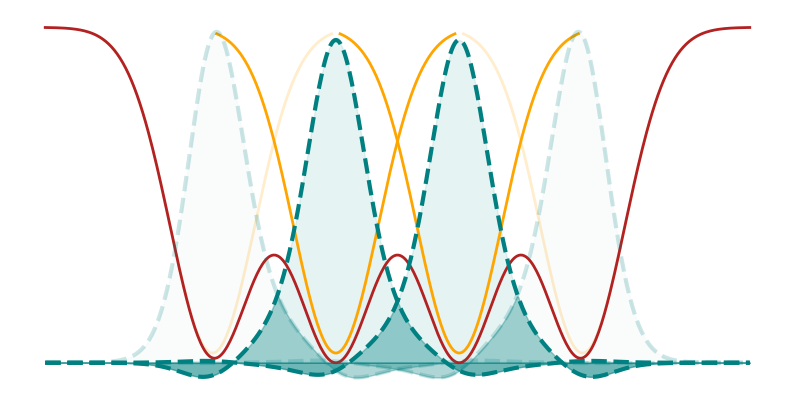

In [49]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


y = np.array([0])
z = np.array([0])
taillen = 1.4

# Plot single traps
for i in range(dvr.lattice.N):
    opacity = 1
    if i in [0, dvr.lattice.N - 1]:
        opacity /= 5
    shift = dvr.trap_centers[i]
    dvr.update_waist(dvr.waists[i])
    x = np.linspace(shift[0] - taillen, shift[0] + taillen, 500)
    X = np.meshgrid(x, y, z, indexing='ij')
    vi = dvr.Voff[i] * DVR.Vfun(dvr, X[0] - shift[0], X[1] - shift[1], X[2])
    plt.plot(x, vi[:, 0, 0], '-', label='V',
             lw=2, color='orange', alpha=opacity)

# Plot total potential
x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x, v[:, 0, 0], '-', label='V', lw=2, color='firebrick')
vmin = np.min(v)

wf = .8 * fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]) + vmin
for i in range(dvr.lattice.N):
    shade_alpha = 0.1
    line_alpa = 1
    line_shape = '--'
    if i in [0, dvr.lattice.N - 1]:
        shade_alpha /= 5
        line_alpa /= 5
        # line_shape = '--'
    plt.plot(x,
             wf[:, i], line_shape, lw=3, color='teal',
             label=f'$w_{i + 1}(x)$', alpha=line_alpa)
    plt.fill_between(x, vmin, wf[:, i], color='darkcyan', alpha=shade_alpha)
for i in dvr.lattice.links:
    plt.fill_between(x, vmin, np.min(np.array([wf[:, i[0]],
                                               wf[:, i[1]]]), axis=0), color='teal', alpha=.3)
plt.xlabel('dx')
plt.axis('off')
plt.savefig('fig1c.svg', transparent=True, bbox_inches='tight')
